From the Online Excel Sheet

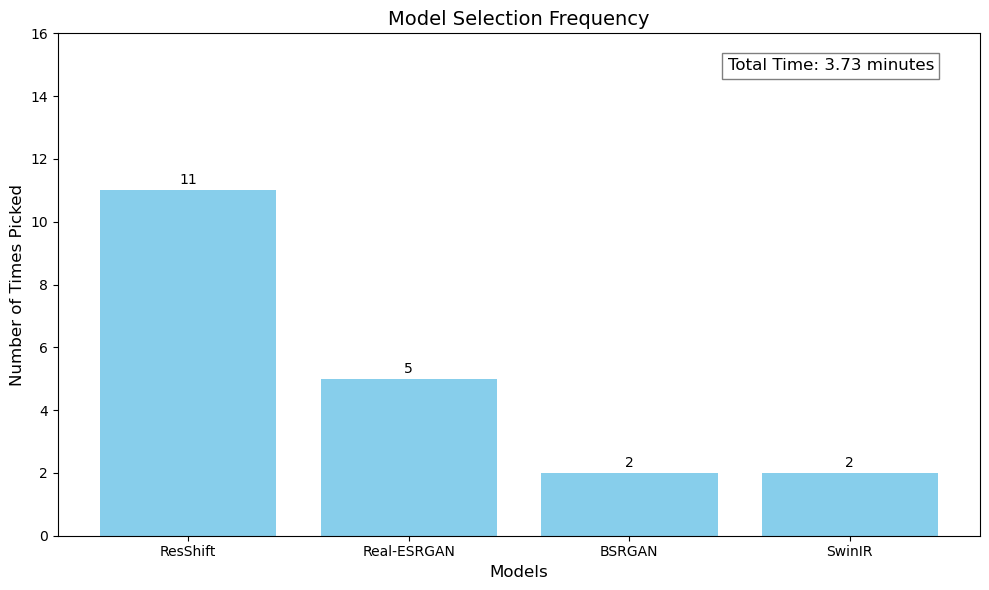

In [3]:
import matplotlib.pyplot as plt
from collections import Counter

# Data as a multi-line string
data = """
0899.png	Real-ESRGAN	18.596409
0845.png	BSRGAN	14.30957
0849.png	Real-ESRGAN	7.592394
0825.png	ResShift	17.009924
0831.png	Real-ESRGAN	16.610943
0896.png	ResShift	7.520809
0829.png	ResShift	11.824872
0887.png	SwinIR	10.070379
0868.png	ResShift	6.20305
0814.png	SwinIR	7.438106
0884.png	Real-ESRGAN	11.03672
0816.png	ResShift	7.280478
0874.png	ResShift	7.237006
0861.png	Real-ESRGAN	5.58689
0837.png	BSRGAN	12.578285
0819.png	ResShift	14.276506
0801.png	ResShift	9.390083
0871.png	ResShift	13.223444
0809.png	ResShift	13.270804
0841.png	ResShift	12.50602
"""

# Parse the data
lines = data.strip().split('\n')
models = []
total_time_seconds = 0

for line in lines:
    parts = line.split('\t')
    if len(parts) == 3:
        filename, model, time_str = parts
        models.append(model)
        try:
            time = float(time_str)
            total_time_seconds += time
        except ValueError:
            print(f"Invalid time value: {time_str} in line: {line}")

# Count the occurrences of each model
model_counts = Counter(models)

# Sort the models by count in descending order
sorted_models = sorted(model_counts.items(), key=lambda x: x[1], reverse=True)
models_sorted, counts_sorted = zip(*sorted_models)

# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models_sorted, counts_sorted, color='skyblue')

# Add counts above the bars
for bar, count in zip(bars, counts_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(count), 
             ha='center', va='bottom', fontsize=10)

# Add total time annotation
plt.xlabel('Models', fontsize=12)
plt.ylabel('Number of Times Picked', fontsize=12)
plt.title('Model Selection Frequency', fontsize=14)
plt.ylim(0, max(counts_sorted) + 5)

# Display total time in seconds at the end of the graph
plt.text(0.95, 0.95, f'Total Time: {total_time_seconds/60:.2f} minutes',
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()
